# Exploring venues in Mumbai, India

### Introduction


The aim of the project is to identify venues in Mumbai, India based on their rating and average prices. In this notebook, we will identify various venues in the city of Pune, India, using Foursquare API and Zomato API, to help visitors select the restaurants that suit them the best.

Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.

Here, we'll identify places that are fit for various individuals based on the information collected from the two APIs and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.

##### Data Collection from APIs

To begin with, we will take a look at Mumbai on the Map using the folium library.

We will also fetch the data from two different APIs.

Foursquare API

Zomato API

In Mumbai there are many venues (especially restaurants, hotels and cafes) which can be explored.

Using data from Google, I have picked the coordinates for centre of Pune.
Using these coordinates, with a radius of 10 km  we will solve the problem

In [8]:
pune_lat = 19.07283
pune_long = 72.88261
print('The geograpical coordinates of Pune are {}, {}.'.format(pune_lat,pune_long))

The geograpical coordinates of Pune are 19.07283, 72.88261.


In [9]:
pwd

'C:\\Users\\Shubham\\Downloads'

Let's use the folium library to create a complete map zoomed on Mumbai. We'll also plot a marker on the coordinates we just identified above. This would give us a relatively good look at the center point we will be considering.

In [10]:
import folium

pune_map = folium.Map(location = [pune_lat,pune_long], zoom_start = 13)
folium.Marker([pune_lat,pune_long]).add_to(pune_map)
pune_map.save("maps/Pune Map.html")
pune_map

###### Foursquare API


We begin by fetching a total of all venues in Mumbai upto a range of 10 Kilometers using the Foursquare API. The Foursquare API has the explore API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

In [11]:
FOURSQUARE_CLIENT_ID = 'SW0ZJMYCVQJD1QDXCHIEJOOXNNDCGVPTJSXCKIHLJZHFIRYD'

FOURSQUARE_CLIENT_SECRET = 'JMQKW0QIV3LH0PG1PW4QLAYN51EJJ4IYYRBZ2WSZPJ4RHFRO'
RADIUS = 10000 # 10 Km
NO_OF_VENUES = 100
VERSION = '20200501'


In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        pune_lat, 
                                                                        pune_long, 
                                                                        RADIUS,
                                                                    
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 100 venues fetched within a total radius of 10.0 Km
Total 85 venues fetched within a total radius of 10.0 Km

Total 185 venues fetched


In [14]:
foursquare_venues


,name,categories,lat,lng
0,Sofitel Mumbai BKC,Hotel,19.067448,72.869006
1,Hamleys,Toy / Game Store,19.086655,72.889783
2,Hitchki,Bar,19.069730,72.869761
3,PVR Cinemas,Movie Theater,19.086643,72.889839
4,Starbucks Coffee Capital,Coffee Shop,19.063457,72.861576
5,Trident,Hotel,19.066808,72.867468
6,MCA Club,Gym Pool,19.060443,72.866020
7,Natural's Ice Cream,Ice Cream Shop,19.077560,72.863035
8,Khau Galli,Food Truck,19.075307,72.905282
9,IVY Restaurant & Banquets,Restaurant,19.069663,72.900535


In [15]:
venues

,name,categories,lat,lng
0,Shivaji Park Beach,Beach,19.029417,72.839718
1,Home Chef,Restaurant,19.024239,72.837775
2,Breeze,Mediterranean Restaurant,19.111788,72.909248
3,Yoga house,Café,19.065609,72.824787
4,Melting Pot,Cocktail Bar,19.101343,72.827221
5,One Fitness Hub And Spa,Gym / Fitness Center,19.121083,72.909699
6,Joey's Pizza,Pizza Place,19.126762,72.830001
7,Sigree Global Grill,Indian Restaurant,19.116539,72.909880
8,Ashok Wada Pao,Indian Restaurant,19.020455,72.831391
9,Mad over Donuts,Donut Shop,19.115847,72.908805


In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(FOURSQUARE_CLIENT_ID, FOURSQUARE_CLIENT_SECRET, VERSION, pune_lat, pune_long, RADIUS, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])
                    
                    
            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)


Zomato API


The Zomato API allows using its search API to search for any given venue based on certain search filters such as query, latitude, longitude and more. Zomato also requires a Zomato user key which can be accessed with a developer account.

We'll use the name, lat, and lng values of various venues fetched from Foursquare API to use the search API and get more information regarding each venue.

The query will be the name of the venue.
The start defines from what offset we want to start, so we'll keep it at 0.
The count defines the number of restaurants we want to fetch. As we have the exact location coordinates, we'll fetch only one.
We will supply the latitude and longitude values.
We will set the sorting criteria as real_distance so each time we get the venue we're searching based on location coordinates.

In [18]:
headers = {'user-key': 'd551bc5f96cdd698553b52dca0150cfb'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [19]:
zomato_venues


,venue,latitude,longitude,price_for_two,price_range,rating,address
0,Tuskers - Sofitel,19.0673347825,72.8691501170,3300.0,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai"
1,Cafe Delhi Heights,19.0874328600,72.8886642500,2000.0,4.0,4.1,"Unit S 21, 2nd Floor, Phoenix Markert City, L...."
2,Masala Library,19.0689743183,72.8696426377,5000.0,4.0,4.4,"Ground Floor, First International Financial Ce..."
3,Peninsula Next,19.0419931160,72.8647784516,1200.0,3.0,3.8,"118, Thomas Villa, Opposite PVR Cinemas, Sion,..."
4,Rassam Express,19.0631252778,72.8617696837,400.0,1.0,3.4,"3rd Floor, Sky Lobby, The Capital Building, Bl..."
5,O22 - Trident,19.0671760249,72.8674921766,4000.0,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com..."
6,Butterfly High,19.0593718000,72.8651976000,1500.0,3.0,4.5,"Unit 4, Ground Floor, Jet Airways, Godrej G Bl..."
7,Natural Ice Cream,19.0776492650,72.8628345206,300.0,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,..."
8,Apsara Ice Creams,19.0796201323,72.9058598354,200.0,1.0,4.1,"8B, Annapurna Industrial Estate, Tilak Road, G..."
9,Ivy Restaurant and Banquets,19.0696001515,72.9003857821,1600.0,3.0,4.1,"Above Shopper's Stop, Amar Mahal, Chembur, Mumbai"


In [20]:
zomato_venues.isnull().sum()
zomato_venues['address'] = zomato_venues['address'].replace(np.nan, 0)
print ("Done")

Done


# Data Cleaning

In [21]:
pune_map = folium.Map(location = [pune_lat,pune_long], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(pune_map)  

pune_map.save("maps/Venues by Foursquare.html")
pune_map

Calculating the difference between the corresponding latitude and longitude values and see if the difference is less than 0.0004 which should ideally mean that the two locations are same.

In [22]:

foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [23]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [24]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Sofitel Mumbai BKC,Hotel,19.0674,72.8690,Tuskers - Sofitel,19.0673,72.8692,3300.0,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai",-0.0001,0.0002
1,Trident,Hotel,19.0668,72.8675,O22 - Trident,19.0672,72.8675,4000.0,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com...",0.0004,0.0000
2,Natural's Ice Cream,Ice Cream Shop,19.0776,72.8630,Natural Ice Cream,19.0776,72.8628,300.0,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,...",0.0000,-0.0002
3,IVY Restaurant & Banquets,Restaurant,19.0697,72.9005,Ivy Restaurant and Banquets,19.0696,72.9004,1600.0,3.0,4.1,"Above Shopper's Stop, Amar Mahal, Chembur, Mumbai",-0.0001,-0.0001
4,Chembur Post Office Wada Pav,Snack Place,19.0569,72.8981,Oven Hot The Bake Shop,19.0569,72.8981,200.0,1.0,3.6,"4 & 5, Ganesh Kutir Building, Near Laxmi Store...",0.0000,0.0000
5,Natural Ice Cream,Dessert Shop,19.0526,72.8998,Tastings,19.0527,72.8998,550.0,2.0,3.5,"Opposite Diamond Garden, Central Avenue Road, ...",0.0001,0.0000
6,Sadguru Juice and Snacks,Indian Restaurant,19.0622,72.9005,Sadguru Veg Diet,19.0622,72.9005,700.0,2.0,3.8,"Janata Market, Near Chembur Station, Chembur, ...",0.0000,0.0000
7,The Royal Orchid,Asian Restaurant,19.0617,72.9016,Orchids,19.0616,72.9016,1200.0,3.0,4.0,"Hotel Royal Orchid, NG Acharya Marg, Chembur, ...",-0.0001,0.0000
8,JW Marriott Mumbai Sahar,Hotel,19.1025,72.8782,Love & Latte,19.1022,72.8782,900.0,2.0,3.9,"The ORB, Retail Arcade, Unit G2 & G3, Ground F...",-0.0003,0.0000
9,Guru Kripa,Indian Restaurant,19.0430,72.8618,Guru Kripa Pani Puri House,19.0429,72.8617,150.0,1.0,2.5,"Guru Kripa Building, Sion West, Sion, Mumbai",-0.0001,-0.0001


#### Filltering : 
There are some places which are inappropriate in this list, such as there are few markets and theatres with some food option, but that is not the optimal choice for a good meal.

Dividing the "price_for_two" column by 2, to find the average price for a single person

In [26]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [27]:
selected_venues

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Hotel,Tuskers - Sofitel,19.0673,72.8692,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai",1650.0
1,Hotel,O22 - Trident,19.0672,72.8675,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com...",2000.0
2,Ice Cream Shop,Natural Ice Cream,19.0776,72.8628,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,...",150.0
3,Restaurant,Ivy Restaurant and Banquets,19.0696,72.9004,3.0,4.1,"Above Shopper's Stop, Amar Mahal, Chembur, Mumbai",800.0
4,Snack Place,Oven Hot The Bake Shop,19.0569,72.8981,1.0,3.6,"4 & 5, Ganesh Kutir Building, Near Laxmi Store...",100.0
5,Dessert Shop,Tastings,19.0527,72.8998,2.0,3.5,"Opposite Diamond Garden, Central Avenue Road, ...",275.0
6,Indian Restaurant,Sadguru Veg Diet,19.0622,72.9005,2.0,3.8,"Janata Market, Near Chembur Station, Chembur, ...",350.0
7,Asian Restaurant,Orchids,19.0616,72.9016,3.0,4.0,"Hotel Royal Orchid, NG Acharya Marg, Chembur, ...",600.0
8,Hotel,Love & Latte,19.1022,72.8782,2.0,3.9,"The ORB, Retail Arcade, Unit G2 & G3, Ground F...",450.0
9,Indian Restaurant,Guru Kripa Pani Puri House,19.0429,72.8617,1.0,2.5,"Guru Kripa Building, Sion West, Sion, Mumbai",75.0



Droping the venues which have 0.0 rating as it means it's not been rated yet

In [28]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 97


## Methodology


This project aims at identifying the venues in Mumbai based on their rating and average costs. This would enable any visitor to identify the venues he/she wants to visit based on their rating and cost preference.

As a first step, we retrieved the data from two APIs (Foursquare and Zomato). We extract venue information from the center of Pune, upto a distance of 10 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.

Secondly, we then explored the data retrieved from the two APIs on the map and identified the top category types. The data from the two sources is carefully combined based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each venue.

Next, we'll analyse the data that we created based on the ratings and price of each venue. We'll identify places where many venues are located so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore areas that are high rated and those that are low rated while also plotting the map of high and low priced venues. Lastly, we'll cluster the venues based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.

Finally, we'll discuss and conclude which venues to be explored based on visitor requirement of rating and cost.

## Analysis

The complete dataset is now in its final form.

We will inspect these venues based on their rating. The rating of a venue are based on user reviews and belongs to a range from 1 to 5. We'll also analyse the venues based on their price per person as well as the price range.

<BarContainer object of 42 artists>

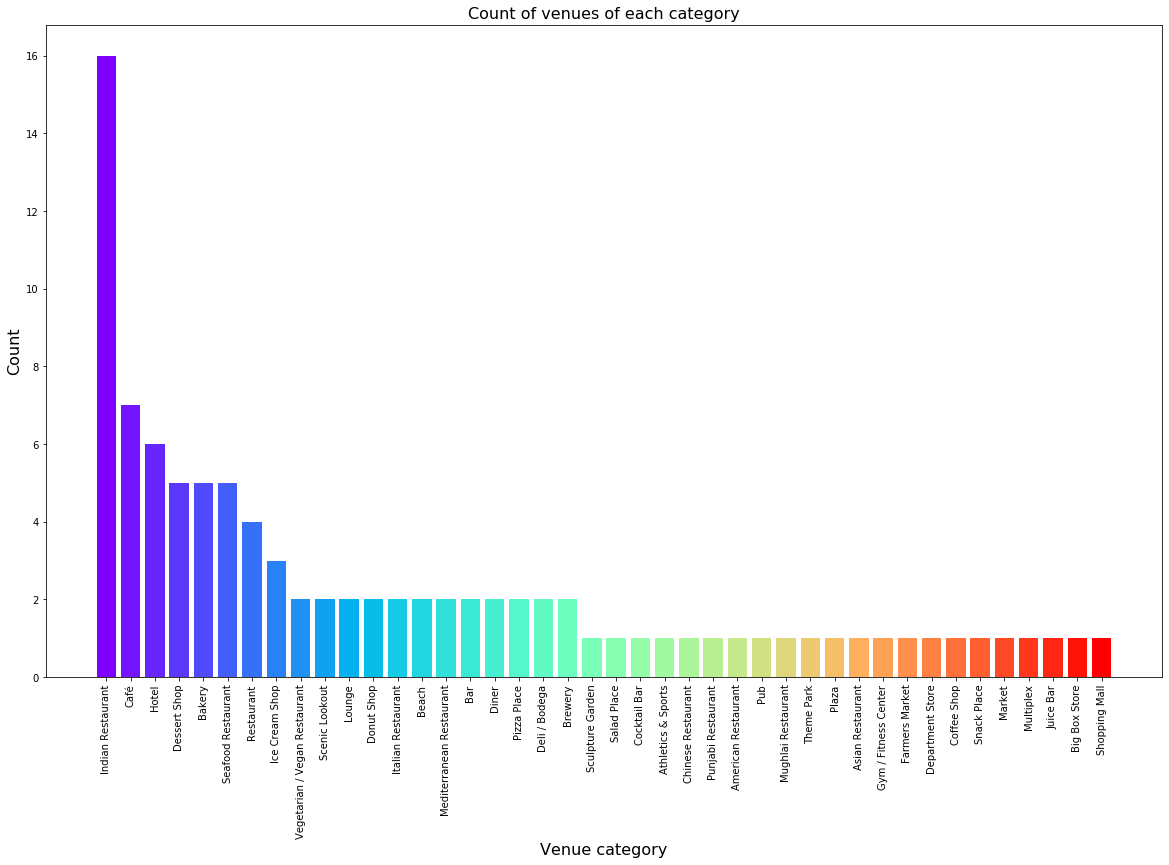

In [29]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

As we can see the majority venues are Indian Restaurant &  Cafe. So, if as a tourist, you're looking for cafes and Indian restaurants, you're in luck.

##### Rating
Rating of a venue is an important factor on which a visitor decides whether it is worth it to visit the place. To cater to this, we will first see what is the average rating for all the venues in the city. Next, we will plot the venues on the map and color code them.

We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating.

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Count of venues with given rating')

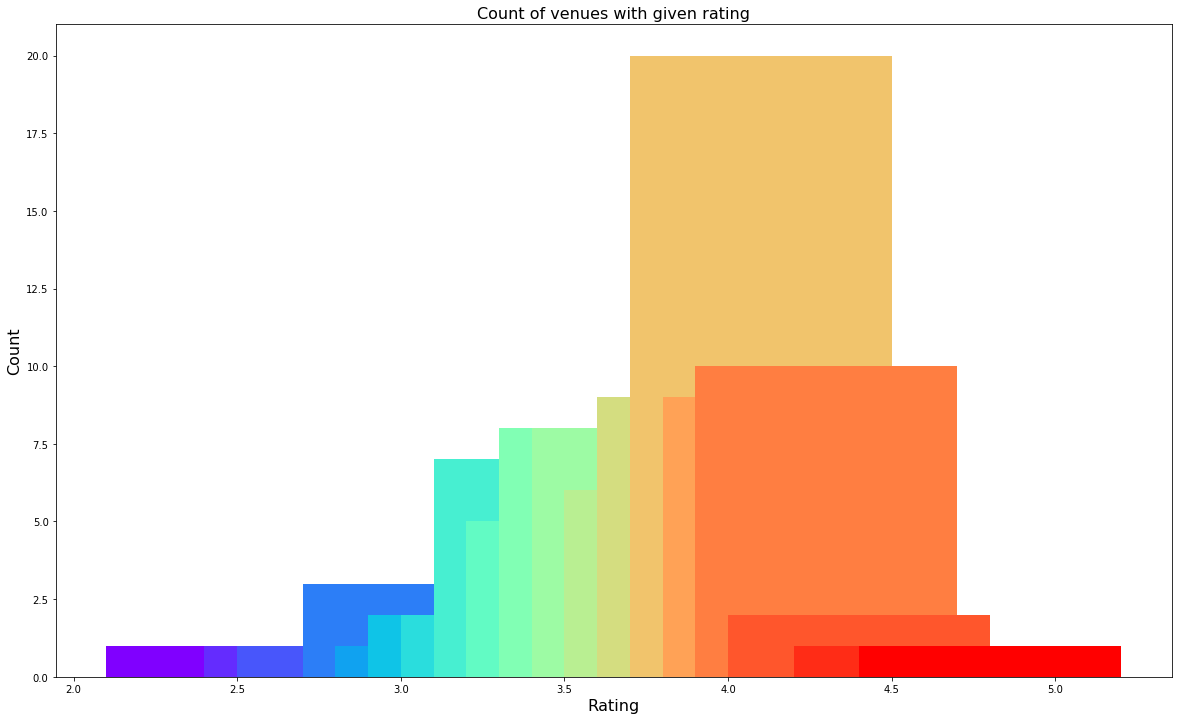

In [30]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

From the plot above, it is clear that majority venues have their rating close to 4.

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:

- 1 to 2
- 2 to 3
- 3 to 4
- 4 to 5

In [31]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

pune_map = folium.Map(location = [pune_lat, pune_long], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(pune_map)  

pune_map.save("maps/Venues Ratings.html")
pune_map

The map has the location of all the venues. It appears that many venues are located around the area of Bandra, Kurla, Chembur with rating above 3. 

##### Price

We will now take a look the venues based on the price values. We have two price features for our venues, one is average_price which defines the average cost for one person and the other is price_range which determines the price range as defined by Zomato.

We will first explore the average_price using a scatter plot between the price and the count of venues with that average price. We'll size the points based on the price to highlight their price.

Text(0.5, 1.0, 'Count of venues with given average price')

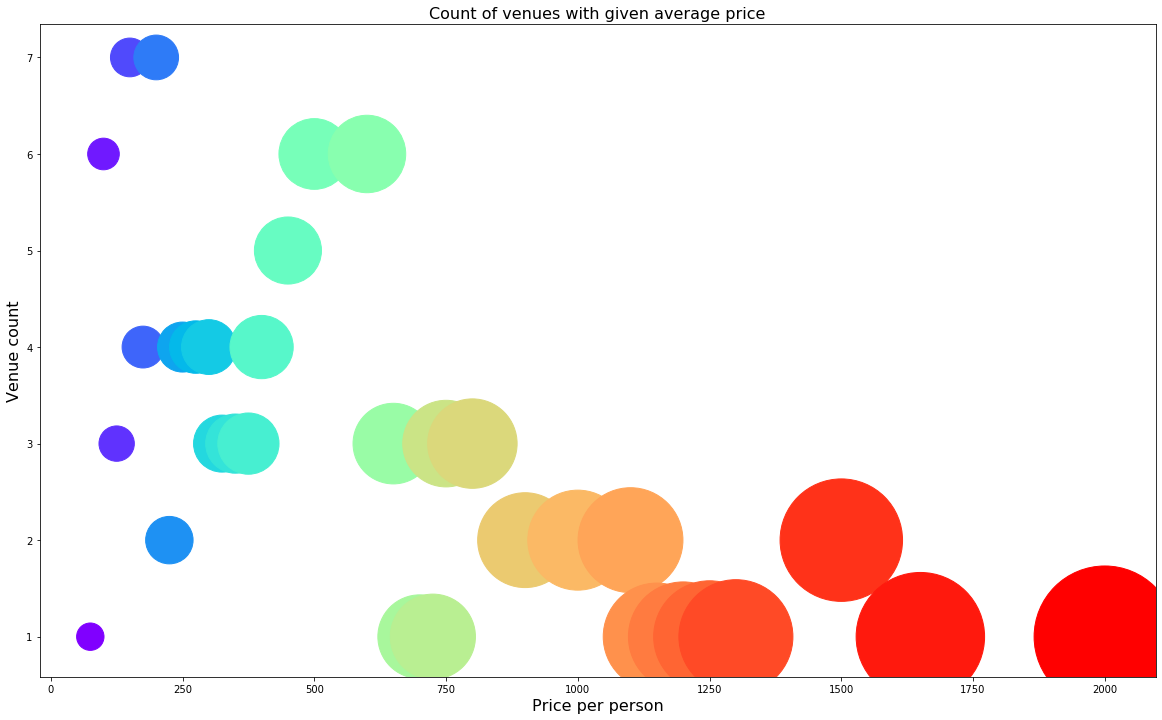

In [33]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

From the plot above we can see that the price range is well scattered, it means we have enough number of restaurants & cafes for every price range.

Users might also be interested in going to a place that fits in their budget. I'll use the price_range column to plot the venues on a map. We'll represent the venues with lower price in green and move towards red as the price increases.

In [34]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

pune_map = folium.Map(location = [pune_lat,pune_long], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(pune_map)  

pune_map.save("maps/Venues Prices.html")
pune_map

The venues around Kalyan & Thane Road are primarily lower priced.
The venues around Bandra & Chembur have medium to steep prices.
Places near Vadgaon Sion & Kurla have low price restaurants.


#### Clustering


We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into two separate groups.

In [35]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Hotel,Tuskers - Sofitel,19.0673,72.8692,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai",1650.0,Good
1,1,Hotel,O22 - Trident,19.0672,72.8675,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com...",2000.0,Good
2,0,Ice Cream Shop,Natural Ice Cream,19.0776,72.8628,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,...",150.0,Very good
3,1,Restaurant,Ivy Restaurant and Banquets,19.0696,72.9004,3.0,4.1,"Above Shopper's Stop, Amar Mahal, Chembur, Mumbai",800.0,Very good
4,0,Snack Place,Oven Hot The Bake Shop,19.0569,72.8981,1.0,3.6,"4 & 5, Ganesh Kutir Building, Near Laxmi Store...",100.0,Good
5,0,Dessert Shop,Tastings,19.0527,72.8998,2.0,3.5,"Opposite Diamond Garden, Central Avenue Road, ...",275.0,Good
6,0,Indian Restaurant,Sadguru Veg Diet,19.0622,72.9005,2.0,3.8,"Janata Market, Near Chembur Station, Chembur, ...",350.0,Good
7,0,Asian Restaurant,Orchids,19.0616,72.9016,3.0,4.0,"Hotel Royal Orchid, NG Acharya Marg, Chembur, ...",600.0,Good
8,0,Hotel,Love & Latte,19.1022,72.8782,2.0,3.9,"The ORB, Retail Arcade, Unit G2 & G3, Ground F...",450.0,Good
9,0,Indian Restaurant,Guru Kripa Pani Puri House,19.0429,72.8617,1.0,2.5,"Guru Kripa Building, Sion West, Sion, Mumbai",75.0,Okay


In [36]:
pune_map = folium.Map(location = [pune_lat,pune_long], zoom_start = 13)
color_map = { 0: 'green', 1: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(pune_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(pune_map)
    
pune_map.save("maps/Venues Clusters.html")
pune_map

From the map, we see the two clusters:

- The first cluster is spread across the whole city and includes the majority venues.
- The second cluster is very sparsely spread and has very limited venues.

I'll also check the venues of the two clusters.


In [37]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Ice Cream Shop,Natural Ice Cream,19.0776,72.8628,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,...",150.0,Very good
1,0,Snack Place,Oven Hot The Bake Shop,19.0569,72.8981,1.0,3.6,"4 & 5, Ganesh Kutir Building, Near Laxmi Store...",100.0,Good
2,0,Dessert Shop,Tastings,19.0527,72.8998,2.0,3.5,"Opposite Diamond Garden, Central Avenue Road, ...",275.0,Good
3,0,Indian Restaurant,Sadguru Veg Diet,19.0622,72.9005,2.0,3.8,"Janata Market, Near Chembur Station, Chembur, ...",350.0,Good
4,0,Asian Restaurant,Orchids,19.0616,72.9016,3.0,4.0,"Hotel Royal Orchid, NG Acharya Marg, Chembur, ...",600.0,Good
5,0,Hotel,Love & Latte,19.1022,72.8782,2.0,3.9,"The ORB, Retail Arcade, Unit G2 & G3, Ground F...",450.0,Good
6,0,Indian Restaurant,Guru Kripa Pani Puri House,19.0429,72.8617,1.0,2.5,"Guru Kripa Building, Sion West, Sion, Mumbai",75.0,Okay
7,0,Dessert Shop,Chocday,19.0752,72.9049,1.0,3.7,"Unit 15, Vikrant Building, Vikrant Circle, Gha...",175.0,Good
8,0,Sculpture Garden,Mi Favorito,19.0750,72.9052,2.0,3.8,"Shop 11, Vikrant Building, Tilak Road, Jhulela...",250.0,Good
9,0,Punjabi Restaurant,Lamba Restaurant & Bar,19.0525,72.8994,2.0,3.7,"15/16, Chhadva Apartments, Sion Trombay Road, ...",375.0,Good


In [38]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 1.80 and rating spread around 3.82


In [39]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Hotel,Tuskers - Sofitel,19.0673,72.8692,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai",1650.0,Good
1,1,Hotel,O22 - Trident,19.0672,72.8675,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com...",2000.0,Good
2,1,Restaurant,Ivy Restaurant and Banquets,19.0696,72.9004,3.0,4.1,"Above Shopper's Stop, Amar Mahal, Chembur, Mumbai",800.0,Very good
3,1,Lounge,Escobar - Tapas Bar,19.0600,72.8361,4.0,3.9,"4th Floor, VN Sphere, Turner And Linking Road,...",1250.0,Good
4,1,Indian Restaurant,Mehman Nawazi,19.1115,72.9092,3.0,3.8,"8th Floor, A Wing, Supreme Business Park, Hira...",725.0,Good
5,1,Seafood Restaurant,Khow Chow,19.0636,72.8348,3.0,4.6,"Shop 2, New Kamal CHS, Waterfield Road, Linkin...",750.0,Very good
6,1,Hotel,Tiara Restaurant & Bar - Meluha The Fern,19.1179,72.9111,4.0,4.2,"Meluha The Fern, Ecotel Hotel, Central Avenue,...",1500.0,Very good
7,1,Bakery,Le Pain Quotidien,19.1185,72.9114,4.0,4.1,"Hotel Rodas, Central Avenue, Hiranandani Garde...",1100.0,Very good
8,1,Italian Restaurant,Terttulia,19.0257,72.8355,3.0,4.1,"Ground Floor, Hotel Parkway, Veer Savarkar Mar...",700.0,Very good
9,1,Italian Restaurant,Mia Cucina,19.1201,72.9071,4.0,4.4,"G3, Transocean House, Lake Boulevard Street, H...",1000.0,Very good


In [40]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 3.55 and rating spread around 4.12


Results and Discussion 

Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Mumbai, India.

We identified that from the total set of venues, majority of them were Cafes and Indian Restaurants. A visitor who loves Cafes/Indian Restaurants would surely benefit from coming to Pune. Many venues are located around the area of Bandra, Kurla, Chembur & Sion with rating above 3.

While the complete range of ratings range from 1 to 5, the majority venues have ratings close to 4. This means that most restaurants provide good quality food which is liked by the people of the city, thus indicating the high rating. 

However, the variation in prices is very well scattered in Mumbai, given the complete range starts from Rs 100 and goes uptil Rs 1200. On plotting the venues based on their price range on the map, we discoveredThe venues around Kurla & Sion are primarily lower priced.The venues around Chembur & Bandra have medium to steep prices.Places near Kalyan & Thane have low price restaurants.

Finally, through clusters we identified that there are many venues which are relatively lower priced but have an average rating of 3.57. On the other hand, there are few venues which are high priced and have average rating of 4.03.